In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib
import itertools
import numpy as np

# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
# Jupyter Notebook Display options
import IPython
IPython.display.display(IPython.display.HTML("<style>:root { --jp-notebook-max-width: 85% !important; }</style>"))
IPython.display.display(IPython.display.HTML("<style>div.output_scroll { height: 54em; }</style>"))

In [24]:
def plot_xi(pm, xi, xi_ref = None, param = None, colorbarlabel = None, marker = None, 
                linestyle = None, linewidth = None, ylim = [0.88,1.12], 
                cmap = 'gist_rainbow', legend = None, legendloc = (0.6,0.78), yaxislabelsize = 16, 
                yaxisticklabelsize = 10, xaxisticklabelsize = 20, bintextpos = [[0.8, 0.875],[0.2,0.875]], 
                bintextsize = 15, figsize = (12, 12), show = 1, thetashow=[3,250]):
    
    (theta, xip, xim) = xi[0]
    (ntheta, ntomo, ntomo2) = xip.shape    

    if ntomo != ntomo2:
        print("Bad Input (ntomo)")
        return 0
            
    if ntheta != len(theta):
        print("Bad Input (theta)")
        return 0

    if xi_ref is None:
        fig, axes = plt.subplots(
            nrows = ntomo, 
            ncols = ntomo, 
            figsize = figsize, 
            sharex = True, 
            sharey = False, 
            gridspec_kw = {'wspace': 0.25, 'hspace': 0.05}
        )
    else:
        fig, axes = plt.subplots(
            nrows = ntomo, 
            ncols = ntomo, 
            figsize = figsize, 
            sharex = True, 
            sharey = True, 
            gridspec_kw = {'wspace': 0.0, 'hspace': 0.0}
        )    

    cm = plt.get_cmap(cmap)

    if not (param is None):
        cb = fig.colorbar(
            matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(param[0], param[-1]), cmap = 'gist_rainbow'), 
            ax = axes.ravel().tolist(), 
            orientation = 'vertical', 
            aspect = 50, 
            pad = -0.16, 
            shrink = 0.3
        )
        if not (colorbarlabel is None):
            cb.set_label(label = colorbarlabel, size = 20, weight = 'bold', labelpad = 2)
        if len(param) != len(xi):
            print("Bad Input")
            return 0

    if not (marker is None):
        markercycler = itertools.cycle(marker)
    
    if not (linestyle is None):
        linestylecycler = itertools.cycle(linestyle)
    else:
        linestylecycler = itertools.cycle(['solid'])
    
    if not (linewidth is None):
        linewidthcycler = itertools.cycle(linewidth)
    else:
        linewidthcycler = itertools.cycle([1.0])
        
    for i in range(ntomo):
        for j in range(ntomo):
            if i>j:                
                axes[j,i].axis('off')
            else:
                ximin = []
                ximax = []
                for (theta, xip, xim) in xi:
                    if pm > 0:
                        ximin.append(np.min(theta*xip[:,i,j]*10**4))
                        ximax.append(np.max(theta*xip[:,i,j]*10**4))
                    else:
                        ximin.append(np.min(theta*xim[:,i,j]*10**4))
                        ximax.append(np.max(theta*xim[:,i,j]*10**4))
                        
                axes[j,i].set_xlim(thetashow)
                
                if xi_ref is None:
                    axes[j,i].set_ylim([np.min(ylim[0]*np.array(ximin)), np.max(ylim[1]*np.array(ximax))])
                else:
                    tmp = np.array(ylim) - 1
                    axes[j,i].set_ylim(tmp.tolist())
                axes[j,i].set_xscale('log')
                axes[j,i].set_yscale('linear')
                
                if i == 0:
                    if xi_ref is None:
                        if pm > 0:
                            axes[j,i].set_ylabel(r"$\theta \xi_{+} \times 10^4$", fontsize=yaxislabelsize)
                        else:
                            axes[j,i].set_ylabel(r"$\theta \xi_{-} \times 10^4$", fontsize=yaxislabelsize)
                    else:
                        if pm > 0:
                            axes[j,i].set_ylabel(r"frac. diff. ($\xi_{+})$", fontsize=yaxislabelsize)
                        else:
                            axes[j,i].set_ylabel(r"frac. diff. ($\xi_{-})$", fontsize=yaxislabelsize)

                if j == ntomo-1:
                    axes[j,i].set_xlabel(r"$\theta$ [arcmin]", fontsize=16)
                for item in (axes[j,i].get_yticklabels()):
                    item.set_fontsize(yaxisticklabelsize)
                for item in (axes[j,i].get_xticklabels()):
                    item.set_fontsize(xaxisticklabelsize)

                if pm > 0:
                    axes[j,i].text(bintextpos[0][0], 
                                   bintextpos[0][1], 
                                   "$(" +  str(i) + "," +  str(j) + ")$", 
                                   horizontalalignment='center', 
                                   verticalalignment='center',
                                   fontsize=bintextsize,
                                   usetex=False,
                                   transform=axes[j,i].transAxes)
                else:
                    axes[j,i].text(bintextpos[1][0], 
                                   bintextpos[1][1], 
                                   "$(" +  str(i) + "," +  str(j) + ")$", 
                                   horizontalalignment='center', 
                                   verticalalignment='center',
                                   fontsize=15,
                                   usetex=False,
                                   transform=axes[j,i].transAxes)

                if xi_ref is None:
                    for x, (theta, xip, xim) in enumerate(xi):
                        if pm > 0:
                            if marker is None:
                                axes[j,i].plot(theta, theta*xip[:,i,j]*10**4, color=cm(x/len(xi)), 
                                               linewidth=next(linewidthcycler), linestyle=next(linestylecycler))
                            else:
                                axes[j,i].plot(theta, theta*xip[:,i,j]*10**4, color=cm(x/len(xi)), 
                                               markerfacecolor='None', marker=next(markercycler), 
                                               markeredgecolor=cm(x/len(xi)), linestyle='None', markersize=3)
                        else:
                            if marker is None:   
                                axes[j,i].plot(theta, theta*xim[:,i,j]*10**4, color=cm(x/len(xi)), 
                                    linewidth=next(linewidthcycler), linestyle=next(linestylecycler))
                            else:
                                axes[j,i].plot(theta, theta*xim[:,i,j]*10**4, color=cm(x/len(xi)), 
                                               markerfacecolor='None', marker=next(markercycler), 
                                               markeredgecolor=cm(x/len(xi)), linestyle='None', markersize=3)
                else:
                    (theta_ref, xip_ref, xim_ref) = xi_ref
                    for x, (theta, xip, xim) in enumerate(xi):
                        if theta != theta_ref:
                            print("inconsistent theta bins")
                            return 0
                        if pm > 0:
                            if marker is None:
                                axes[j,i].plot(theta, xip[:,i,j]/xip_ref[:,i,j]-1.0, color=cm(x/len(xi)), 
                                               linewidth=next(linewidthcycler), linestyle=next(linestylecycler))
                            else:
                                axes[j,i].plot(theta, xip[:,i,j]/xip_ref[:,i,j]-1.0, 
                                               color=cm(x/len(xi)), markerfacecolor='None',
                                               marker=next(markercycler),  markeredgecolor=cm(x/len(xi)), 
                                               linestyle='None', markersize=3)
                        else:
                            if marker is None:   
                                lines = axes[j,i].plot(theta, xip[:,i,j]/xip_ref[:,i,j]-1.0, color=cm(x/len(xi)), 
                                                       linewidth=next(linewidthcycler), linestyle=next(linestylecycler))
                            else:
                                axes[j,i].plot(theta, xip[:,i,j]/xip_ref[:,i,j]-1.0, color=cm(x/len(xi)), 
                                               markerfacecolor='None', marker=next(markercycler), 
                                               markeredgecolor=cm(x/len(xi)), 
                                               linestyle='None', markersize=3)    
    if not (legend is None):
        if len(legend) != len(xi):
            print("Bad Input")
            return 0
        fig.legend(legend, 
                   loc=legendloc,
                   borderpad=0.1,
                   handletextpad=0.4,
                   handlelength=1.5,
                   columnspacing=0.35,
                   scatteryoffsets=[0],
                   frameon=False)  
    if not (show is None):
        fig.show()
    else:
        return (fig, axes)

In [25]:
def plot_gammat_tomo_limber(theta_gammat, gammat_ref = None, param = None, colorbarlabel = None, marker = None, 
                            linestyle = None, linewidth = None, ylim = [0.75,1.25],
                            cmap = 'gist_rainbow', legend = None, legendloc = (0.6,0.78), yaxislabelsize = 16, 
                            yaxisticklabelsize = 10,  xaxisticklabelsize = 20, bintextpos = [0.2, 0.85], 
                            bintextsize = 15, figsize = (12, 12), show = 1, thetashow=[3,250]):

    (theta, gammat) = theta_gammat[0]
    ntheta, nlens, nsource = gammat.shape
    
    if ntheta != len(theta):
        print("Bad Input (theta)")
        print(theta)
        print(ntheta, len(theta))
        return 0

    if not (gammat_ref is None):
        (theta1, gammat2) = gammat_ref
        ntheta2, nlens2, nsource2 = gammat2.shape
        if (nlens != nlens2) or (ntheta != ntheta2) or (nsource != nsource2):
            print("Bad Input")
            print(f"Nlens = {nlens}, Nlens_REF = {ntheta2}")
            print(f"Nsource = {nsource}, Nsource_REF = {nsource2}")
            print(f"Ntheta = {ntheta}, Ntheta_REF = {ntheta2}")
            return 0   
        
    if gammat_ref is None:
        fig, axes = plt.subplots(
            nrows = nsource, 
            ncols = nlens, 
            figsize = figsize, 
            sharex = True, 
            sharey = False, 
            gridspec_kw = {'wspace': 0.25, 'hspace': 0.05})
    else:
        fig, axes = plt.subplots(
            nrows = nsource, 
            ncols = nlens, 
            figsize = figsize, 
            sharex = True, 
            sharey = True, 
            gridspec_kw = {'wspace': 0, 'hspace': 0})
    
    cm = plt.get_cmap(cmap)
    
    if not (param is None):
        cb = fig.colorbar(
            matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(param[0], param[-1]), cmap = cmap), 
            ax = axes.ravel().tolist(), 
            orientation = 'vertical', 
            aspect = 50, 
            pad = 0.03, 
            shrink = 0.5)
        if not (colorbarlabel is None):
            cb.set_label(label = colorbarlabel, size = 20, weight = 'bold', labelpad = 2)
        if len(param) != len(theta_gammat):
            print("Bad Input")
            return 0

    if not (marker is None):
        markercycler = itertools.cycle(marker)
        
    if not (linestyle is None):
        linestylecycler = itertools.cycle(linestyle)
    else:
        linestylecycler = itertools.cycle(['solid'])

    if not (linewidth is None):
        linewidthcycler = itertools.cycle(linewidth)
    else:
        linewidthcycler = itertools.cycle([1.0])

    for i in range(nlens):
        for j in range(nsource):
            ximin = []
            ximax = []
            for (theta, gammat) in theta_gammat:  
                ximin.append(np.min(np.abs(gammat[:,i,j])))
                ximax.append(np.max(np.abs(gammat[:,i,j])))
 
            axes[j,i].set_xlim(thetashow)
            
            if gammat_ref is None:
                axes[j,i].set_ylim([np.min(ylim[0]*np.array(ximin)),np.max(ylim[1]*np.array(ximax))])
                axes[j,i].set_yscale('log')
            else:
                tmp = np.array(ylim) - 1
                axes[j,i].set_ylim(tmp.tolist())
                axes[j,i].set_yscale('linear')
                
            axes[j,i].set_xscale('log')
            
            if i == 0:
                if gammat_ref is None:
                    axes[j,i].set_ylabel("$|\gamma_{t}(\\theta)|$", fontsize=yaxislabelsize)
                else:
                    axes[j,i].set_ylabel("frac. diff.", fontsize=yaxislabelsize)
            for item in (axes[j,i].get_yticklabels()):
                item.set_fontsize(yaxisticklabelsize)
            for item in (axes[j,i].get_xticklabels()):
                item.set_fontsize(xaxisticklabelsize)
            
            if j == nsource-1:
                axes[j,i].set_xlabel("$\\theta$", fontsize=16)
            
            axes[j,i].text(bintextpos[0], bintextpos[1], 
                "$(" +  str(i+1) + "," +  str(j+1) + ")$", 
                horizontalalignment = 'center', 
                verticalalignment = 'center',
                fontsize = bintextsize,
                usetex = False,
                transform = axes[j,i].transAxes)

            for x, (theta, gammat) in enumerate(theta_gammat):
                if gammat_ref is None:
                    tmp = np.abs(gammat[:,i,j])
                else:
                    (theta1, gammat2) = gammat_ref
                    tmp = gammat[:,i,j]/gammat2[:,i,j] - 1
                
                if marker is None:
                    axes[j,i].plot(theta, 
                                   tmp, 
                                   color=cm(x/len(theta_gammat)), 
                                   linewidth=next(linewidthcycler), 
                                   linestyle=next(linestylecycler))
                else:
                    axes[j,i].plot(theta, 
                                   tmp, 
                                   color=cm(x/len(theta_gammat)), 
                                   markerfacecolor='None', 
                                   marker=next(markercycler),
                                   markeredgecolor=cm(x/len(theta_gammat)), 
                                   linestyle='None', 
                                   markersize=3)                    
    
    if not (legend is None):
        if len(legend) != len(theta_gammat):
            print("Bad Input")
            return 0
        fig.legend(
            legend, 
            loc=legendloc,
            borderpad=0.1,
            handletextpad=0.4,
            handlelength=1.5,
            columnspacing=0.35,
            scatteryoffsets=[0],
            frameon=False)

    if not (show is None):
        fig.show()
    else:
        return (fig, axes)

In [26]:
def plot_wtheta_tomo(theta_wtheta, theta_wtheta_ref = None, param = None, colorbarlabel = None, marker = None, 
                     linestyle = None, linewidth = None, ylim = [0.75,1.25],
                     cmap = 'gist_rainbow', legend = None, legendloc = (0.6,0.78), yaxislabelsize = 16, 
                     yaxisticklabelsize = 10,  xaxisticklabelsize = 20, bintextpos = [0.2, 0.85], 
                     bintextsize = 15, figsize = (12, 12), show = True, thetashow=[3,250]):

    (theta, wtheta) = theta_wtheta[0]
    ntheta, nlens1, nlens2 = wtheta.shape
    if nlens1 != nlens2:
        print("Bad Input (number of nlens1/nlens2)")
        return 0
        
    if ntheta != len(theta):
        print("Bad Input (theta)")
        print(theta)
        print(ntheta, len(theta))
        return 0

    if not (theta_wtheta_ref is None):
        (theta1, wtheta2) = theta_wtheta_ref
        ntheta2, nlens3, nlens4 = wtheta2.shape
        if nlens3 != nlens4:
            print("Bad Input (number of nlens3/nlens4)")
            return 0
        if (nlens1 != nlens3) or (ntheta != ntheta2):
            print("Bad Input")
            print(f"Nlens = {nlens1}, Nlens_REF = {nlens3}")
            print(f"Ntheta = {ntheta}, Ntheta_REF = {ntheta2}")
            return 0   
        
    if theta_wtheta_ref is None:
        fig, axes = plt.subplots(
            nrows = 1, 
            ncols = nlens1, 
            figsize = figsize, 
            sharex = True, 
            sharey = False, 
            gridspec_kw = {'wspace': 0.25, 'hspace': 0.05})
    else:
        fig, axes = plt.subplots(
            nrows = 1, 
            ncols = nlens1, 
            figsize = figsize, 
            sharex = True, 
            sharey = True, 
            gridspec_kw = {'wspace': 0, 'hspace': 0})
    
    cm = plt.get_cmap(cmap)
    
    if not (param is None):
        cb = fig.colorbar(
            matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(param[0], param[-1]), cmap = cmap), 
            ax = axes.ravel().tolist(), 
            orientation = 'vertical', 
            aspect = 50, 
            pad = 0.03, 
            shrink = 1.0)
        if not (colorbarlabel is None):
            cb.set_label(label = colorbarlabel, size = 20, weight = 'bold', labelpad = 2)
        if len(param) != len(theta_wtheta):
            print("Bad Input")
            return 0

    if not (marker is None):
        markercycler = itertools.cycle(marker)    
    if not (linestyle is None):
        linestylecycler = itertools.cycle(linestyle)
    else:
        linestylecycler = itertools.cycle(['solid'])
    if not (linewidth is None):
        linewidthcycler = itertools.cycle(linewidth)
    else:
        linewidthcycler = itertools.cycle([1.0])

    for i in range(nlens1):
        ximin = []
        ximax = []
        for (theta, wtheta) in theta_wtheta:  
            ximin.append(np.min(np.abs(wtheta[:,i,i])))
            ximax.append(np.max(np.abs(wtheta[:,i,i])))

        axes[i].set_xlim(thetashow)
        
        if theta_wtheta_ref is None:
            axes[i].set_ylim([np.min(ylim[0]*np.array(ximin)),np.max(ylim[1]*np.array(ximax))])
            axes[i].set_yscale('log')
        else:
            tmp = np.array(ylim) - 1
            axes[i].set_ylim(tmp.tolist())
            axes[i].set_yscale('linear')
            
        axes[i].set_xscale('log')
        
        if i == 0:
            if theta_wtheta_ref is None:
                axes[i].set_ylabel("$|w_{t}(\\theta)|$", fontsize=yaxislabelsize)
            else:
                axes[i].set_ylabel("frac. diff.", fontsize=yaxislabelsize)
        for item in (axes[i].get_yticklabels()):
            item.set_fontsize(yaxisticklabelsize)
        for item in (axes[i].get_xticklabels()):
            item.set_fontsize(xaxisticklabelsize)

        axes[i].set_xlabel("$\\theta$", fontsize=16)
        
        axes[i].text(bintextpos[0], bintextpos[1], 
            "$(" +  str(i+1) + ")$", 
            horizontalalignment = 'center', 
            verticalalignment = 'center',
            fontsize = bintextsize,
            usetex = False,
            transform = axes[i].transAxes)

        for x, (theta, wtheta) in enumerate(theta_wtheta):
            if theta_wtheta_ref is None:
                tmp = np.abs(wtheta[:,i,i])
            else:
                (theta1, wtheta2) = theta_wtheta_ref
                tmp = wtheta[:,i,i]/wtheta2[:,i,i] - 1
            
            if marker is None:
                axes[i].plot(theta, 
                               tmp, 
                               color=cm(x/len(theta_wtheta)), 
                               linewidth=next(linewidthcycler), 
                               linestyle=next(linestylecycler))
            else:
                axes[i].plot(theta, 
                               tmp, 
                               color=cm(x/len(theta_wtheta)), 
                               markerfacecolor='None', 
                               marker=next(markercycler),
                               markeredgecolor=cm(x/len(theta_wtheta)), 
                               linestyle='None', 
                               markersize=3)                    
    
    if not (legend is None):
        if len(legend) != len(theta_wtheta):
            print("Bad Input")
            return 0
        fig.legend(
            legend, 
            loc=legendloc,
            borderpad=0.1,
            handletextpad=0.4,
            handlelength=1.5,
            columnspacing=0.35,
            scatteryoffsets=[0],
            frameon=False)
    if not (show is None):
        fig.show()
    else:
        return (fig, axes)

In [27]:
def convertxi2plot(data, ntomos, nthetas):
    new = np.zeros((nthetas,ntomos,ntomos))
    idx = 0
    for i in range(ntomos):
        for j in range(0,i+1):
           new[:,i,j] = data[idx*nthetas:(idx+1)*nthetas]
           new[:,j,i] = new[:,i,j]
           idx+=1
    
    return new
def convertgammat2plot(data, ntomos1, ntomos2, nthetas):
    new = np.zeros((nthetas,ntomos1,ntomos2))
    idx = 0
    for i in range(ntomos1):
        for j in range(ntomos2):
           new[:,i,j] = data[idx*nthetas:(idx+1)*nthetas]
           idx+=1
    
    return new
def convertwtheta2plot(data, ntomos, nthetas):
    new = np.zeros((nthetas,ntomos,ntomos))
    idx = 0
    for i in range(ntomos):
           new[:,i,i] = data[idx*nthetas:(idx+1)*nthetas]
           idx+=1
    
    return new
     

In [28]:
cocoa_datavector = np.loadtxt('./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector')[:,1]
fire_datavector = np.loadtxt('./firecrown/examples/des_y1_3x2pt/output_factory1/data_vector/firecrown_theory.txt')

nthetas = 20
thetas = 10**np.linspace(np.log10(2.5),np.log10(250.0), nthetas)

xip_cocoa = convertxi2plot(cocoa_datavector[:200], ntomos=4, nthetas=nthetas)
xim_cocoa = convertxi2plot(cocoa_datavector[200:400], ntomos=4, nthetas=nthetas)
gammat_cocoa = convertgammat2plot(cocoa_datavector[400:800], ntomos1=4, ntomos2=5, nthetas=nthetas)
wtheta_cocoa = convertwtheta2plot(cocoa_datavector[800:900], ntomos=5, nthetas=nthetas)

xip_fire = convertxi2plot(fire_datavector[:200], ntomos=4, nthetas=nthetas)
xim_fire = convertxi2plot(fire_datavector[200:400], ntomos=4, nthetas=nthetas)
gammat_fire = convertgammat2plot(fire_datavector[400:800], ntomos1=4, ntomos2=5, nthetas=nthetas)
wtheta_fire = convertwtheta2plot(fire_datavector[800:900], ntomos=5, nthetas=nthetas)

Input_xi_cocoa = (thetas, xip_cocoa, xim_cocoa)
Input_xi_fire  = (thetas, xip_fire, xim_fire)
Input_gammat_cocoa = (thetas, gammat_cocoa)
Input_gammat_fire  = (thetas, gammat_fire)
Input_wtheta_cocoa = (thetas, wtheta_cocoa)
Input_wtheta_fire  = (thetas, wtheta_fire)

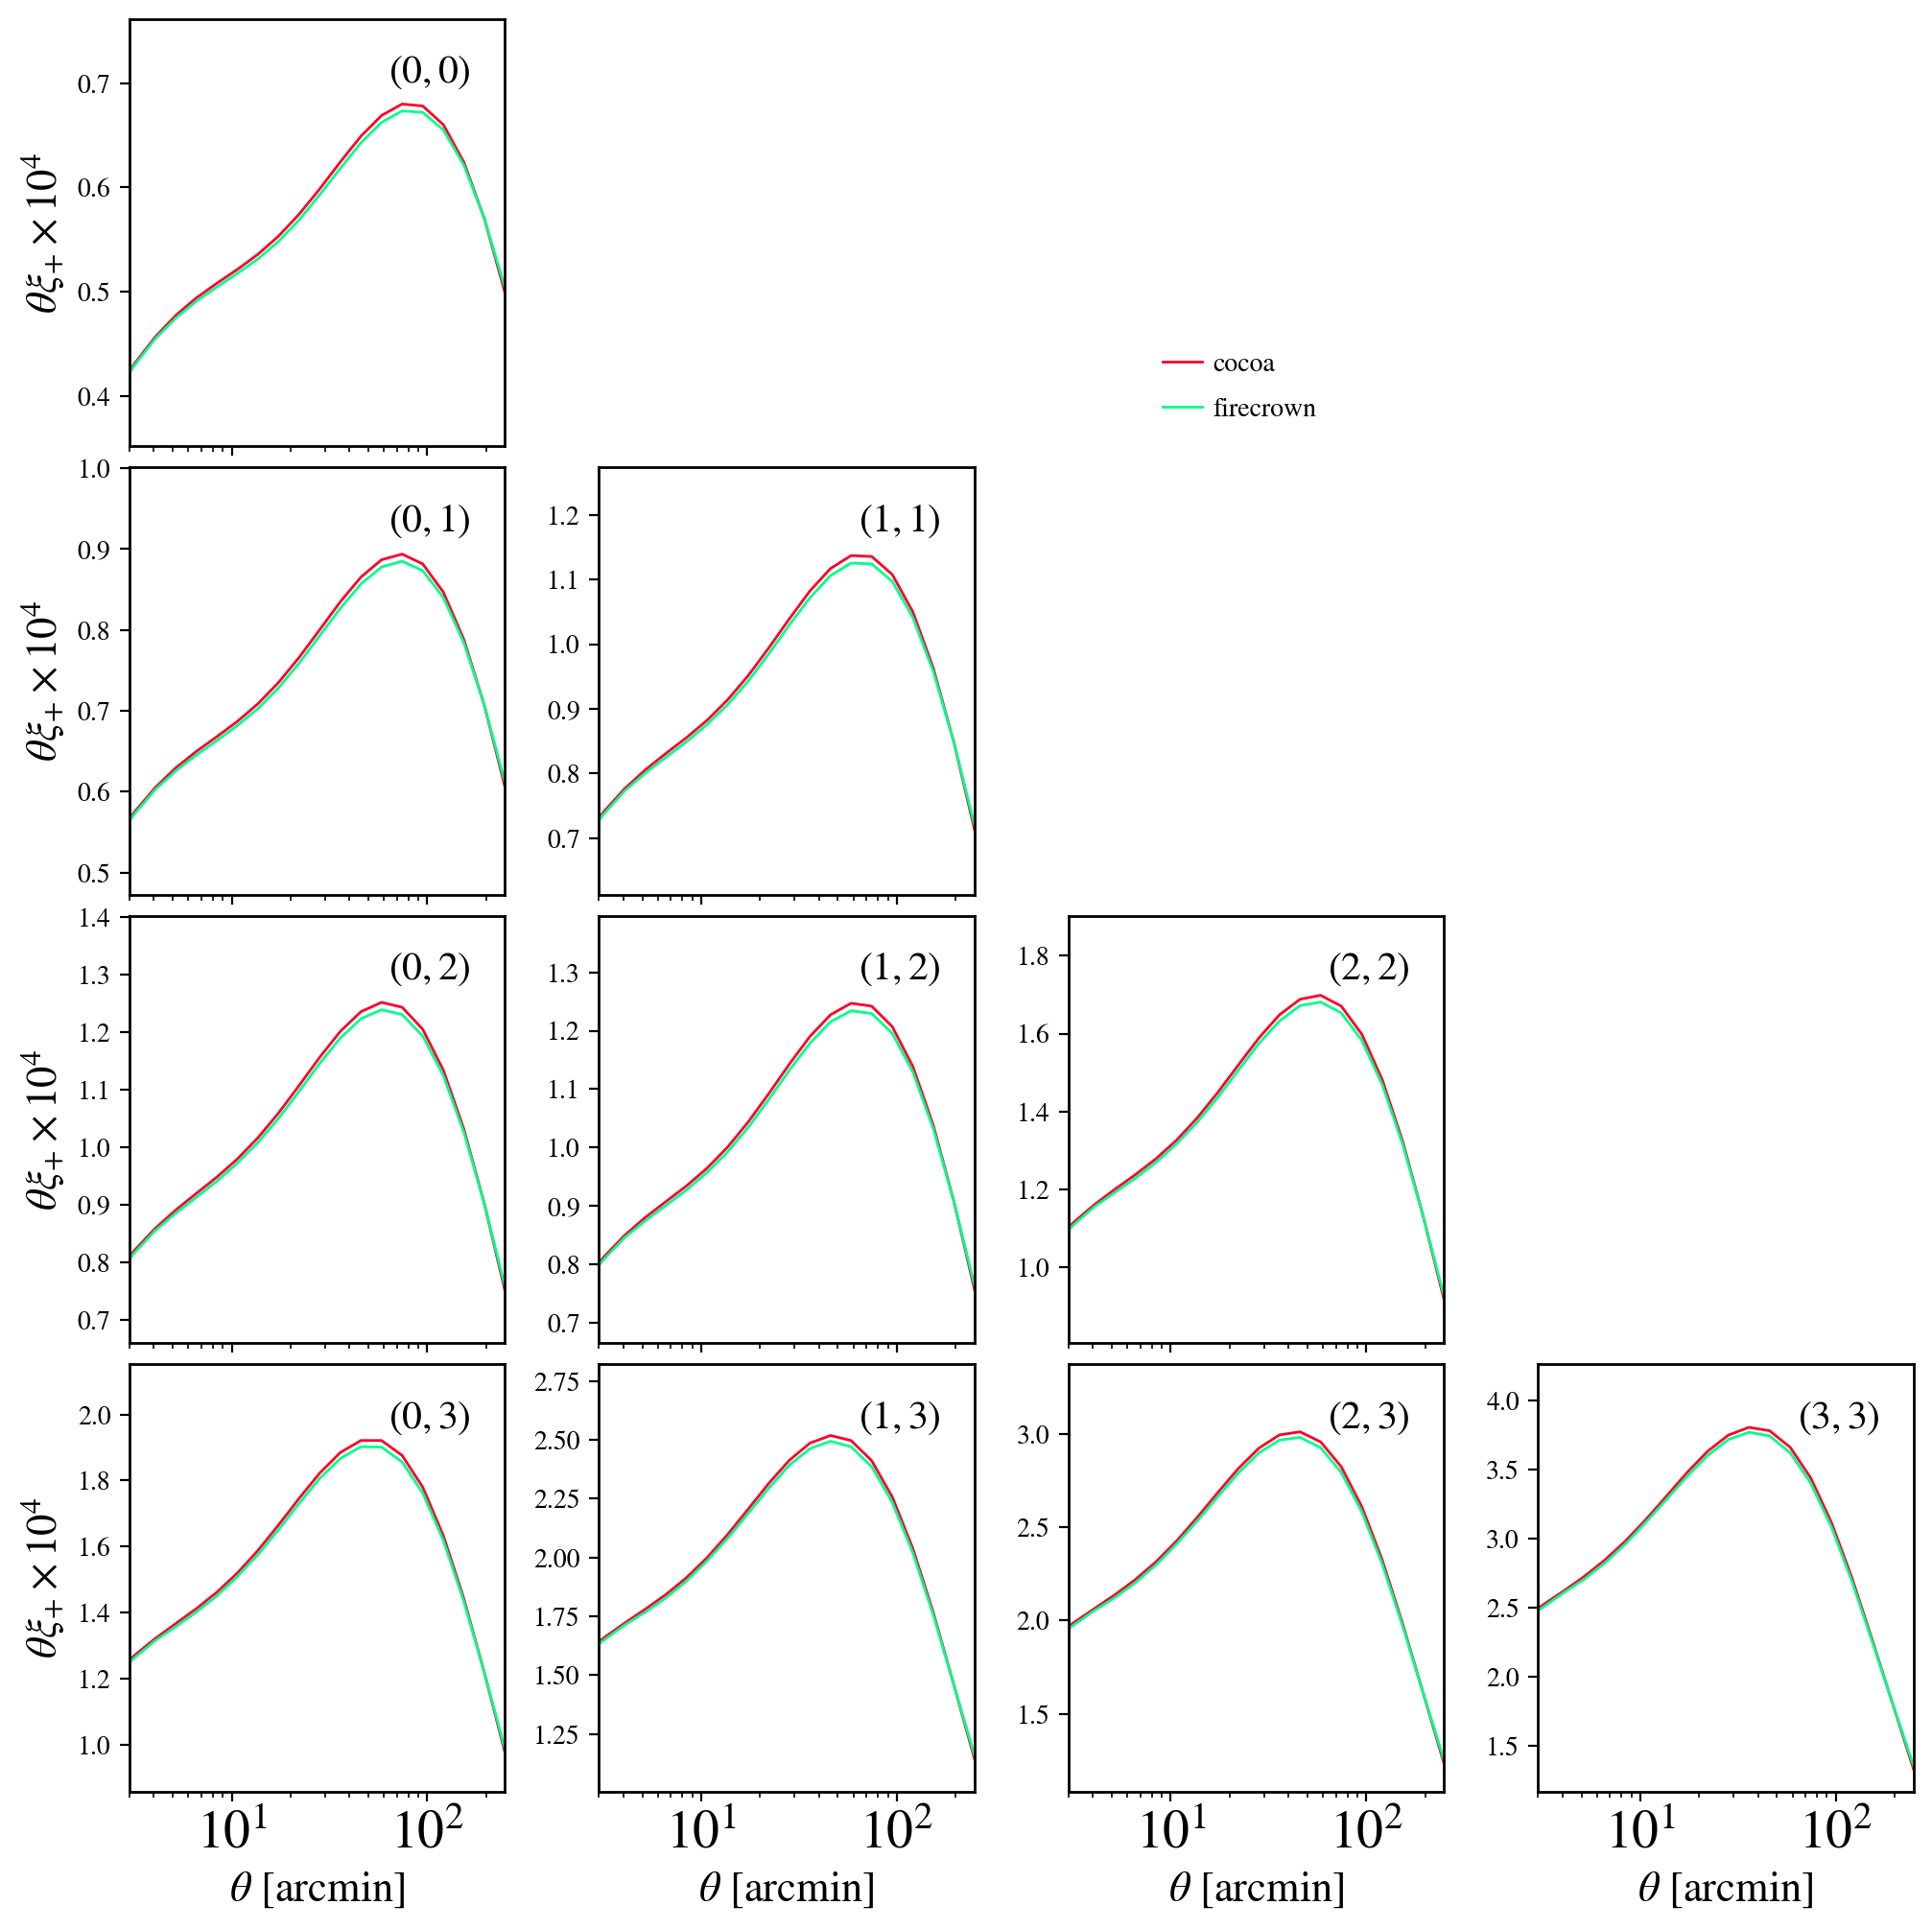

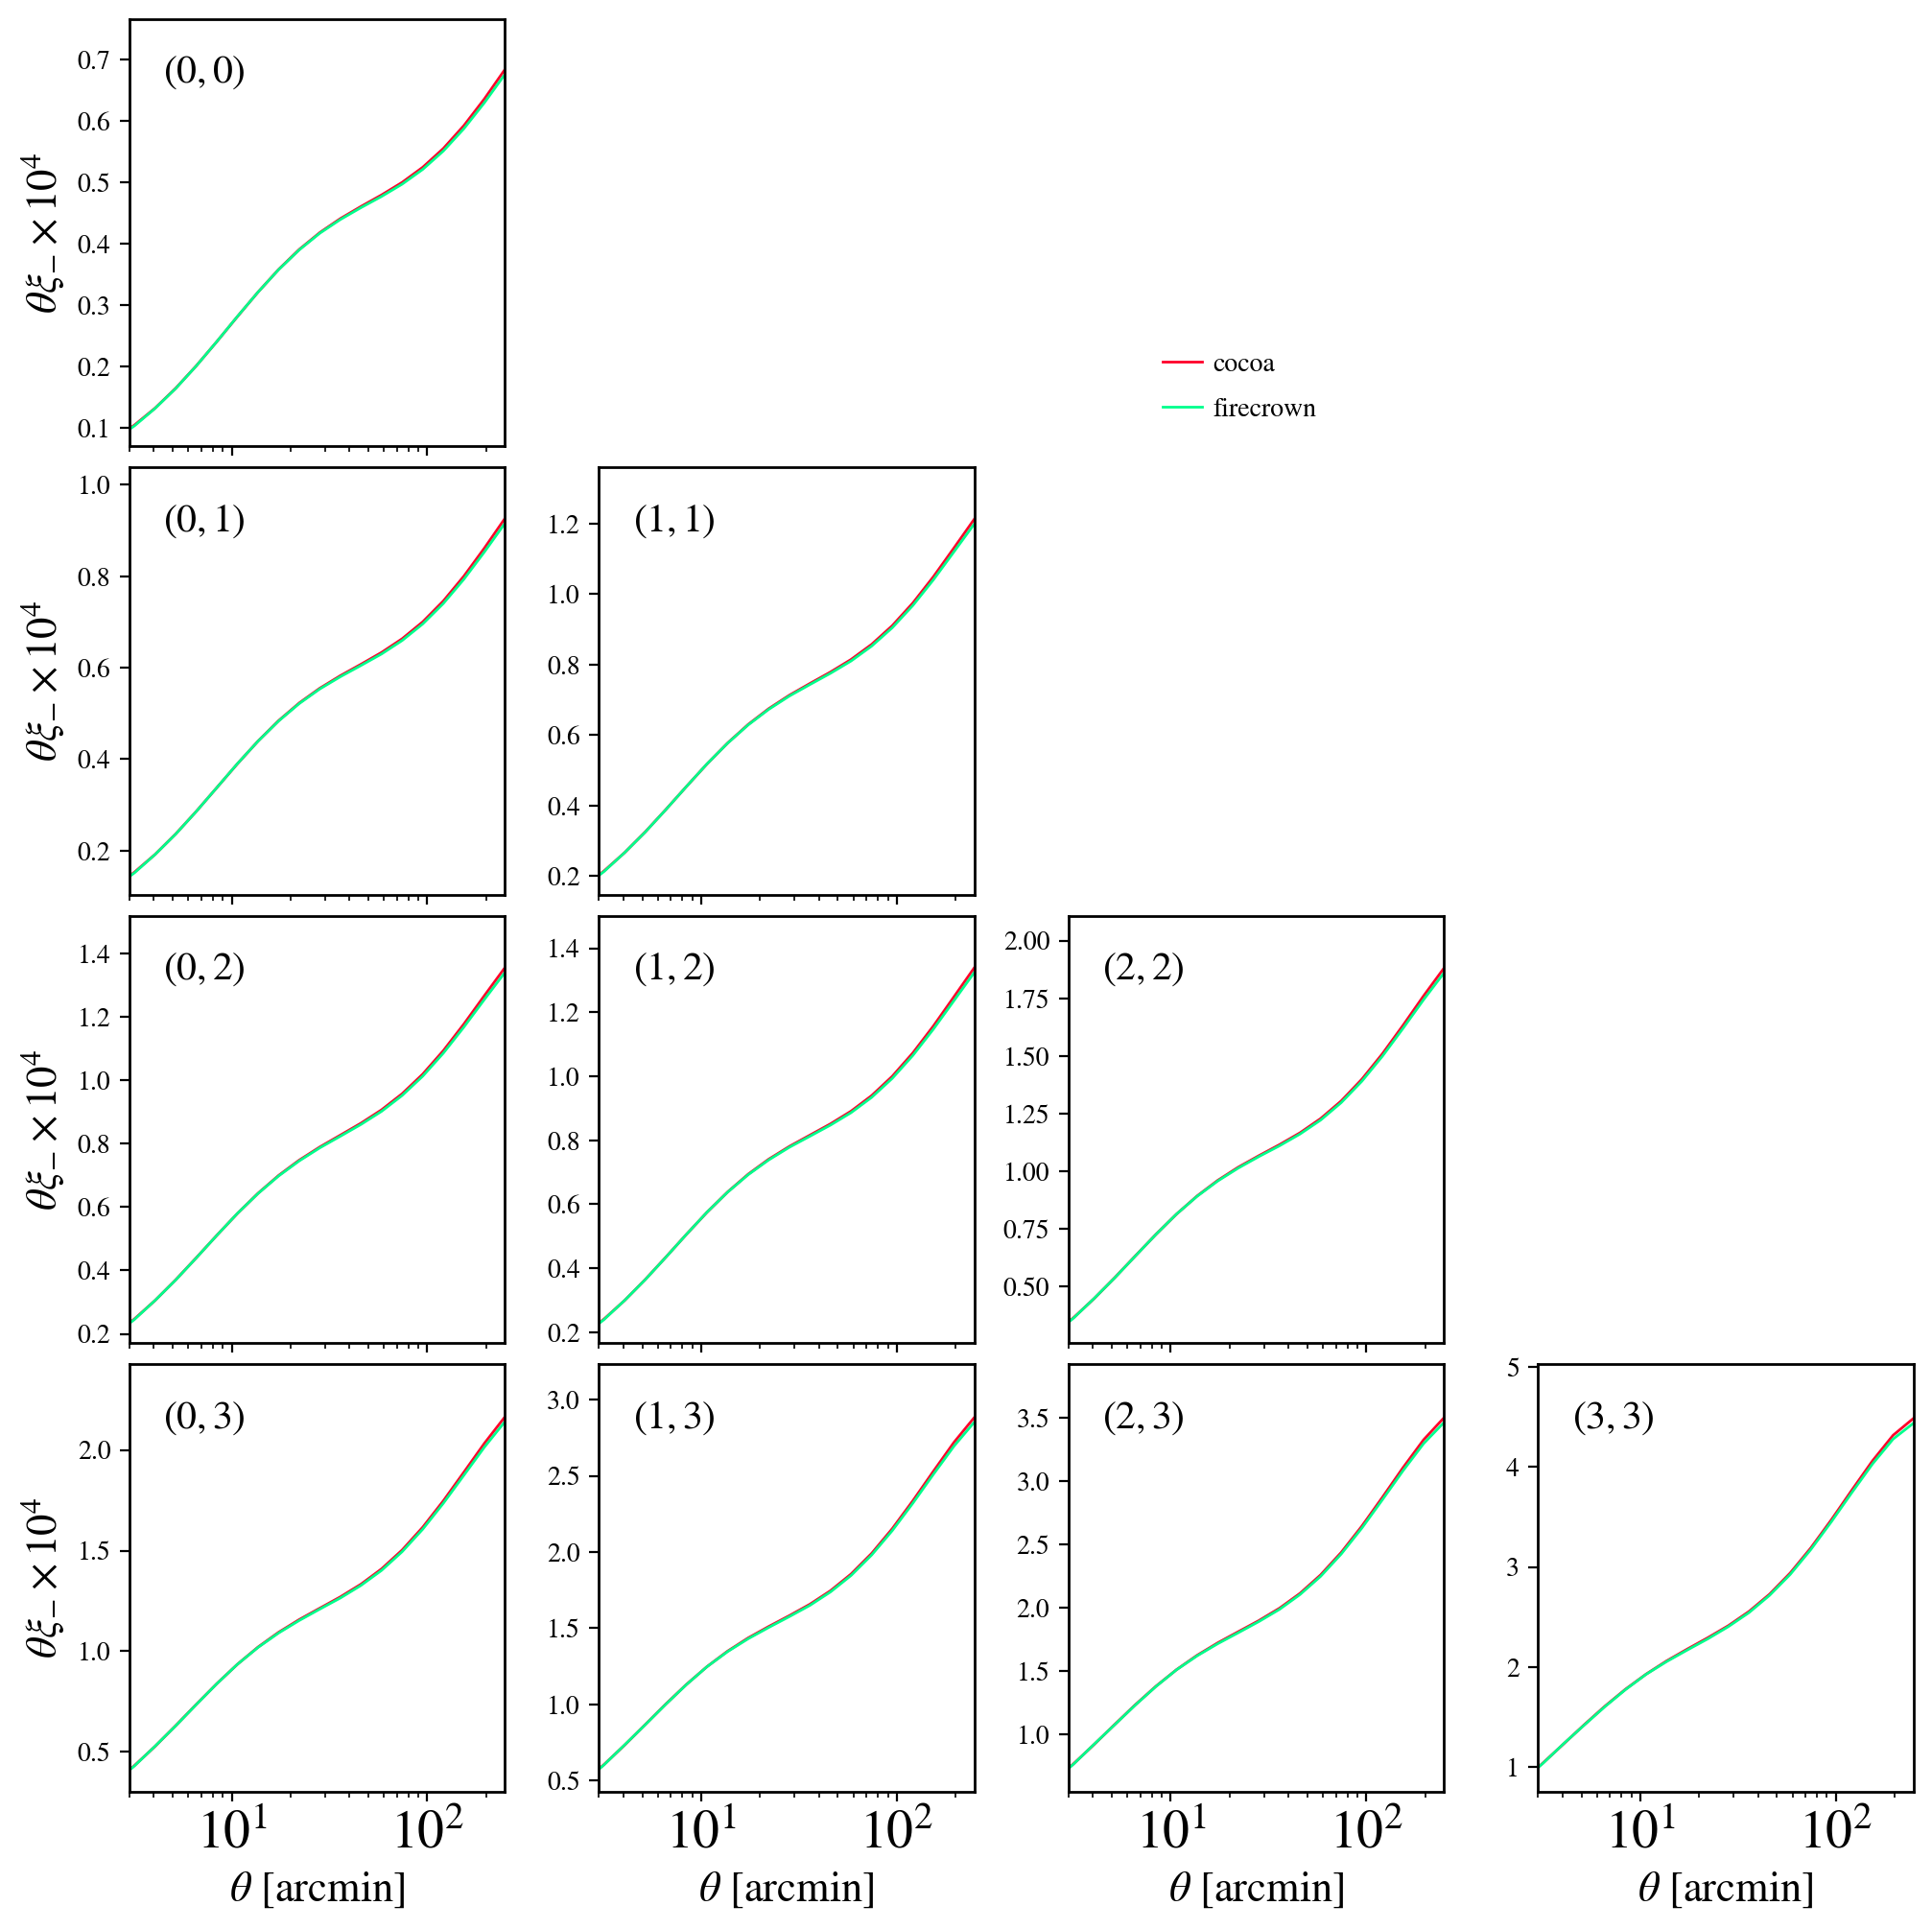

In [29]:
plot_xi(pm = 1, xi = [Input_xi_cocoa, Input_xi_fire],legend=['cocoa', 'firecrown'])
plot_xi(pm = -1, xi = [Input_xi_cocoa, Input_xi_fire],legend=['cocoa', 'firecrown'])

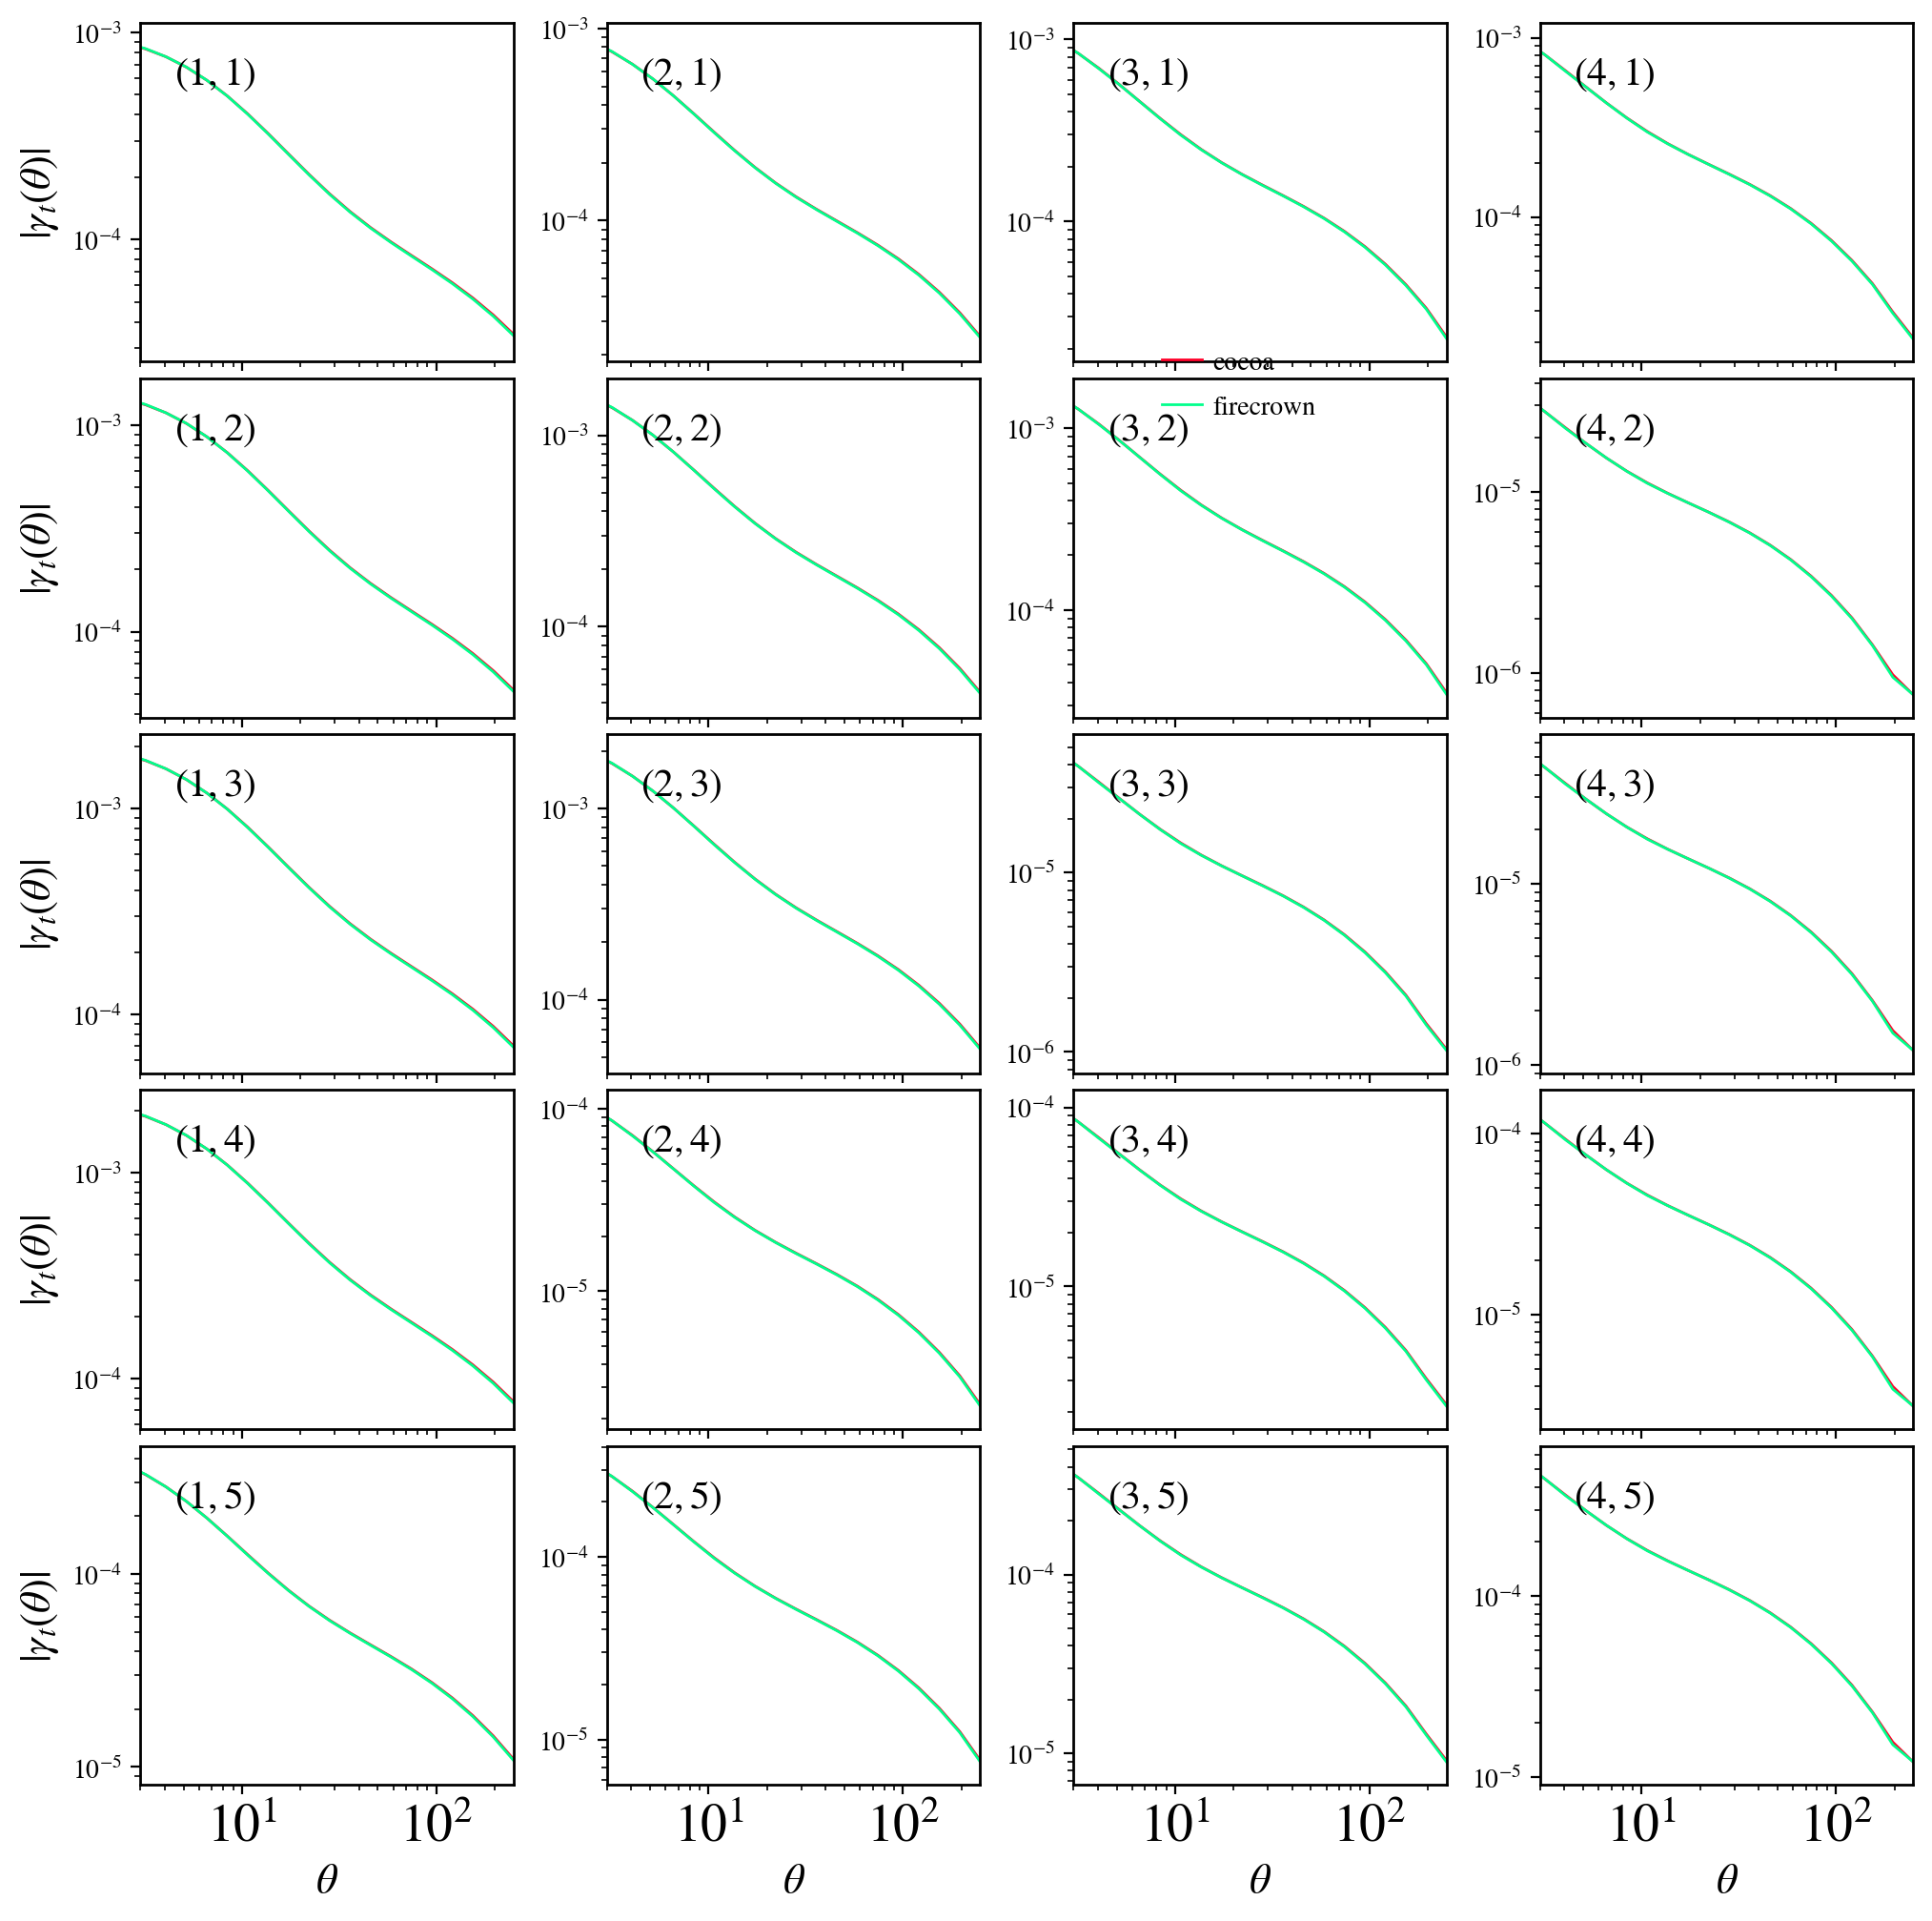

In [30]:
plot_gammat_tomo_limber([Input_gammat_cocoa, Input_gammat_fire], legend=['cocoa','firecrown'])

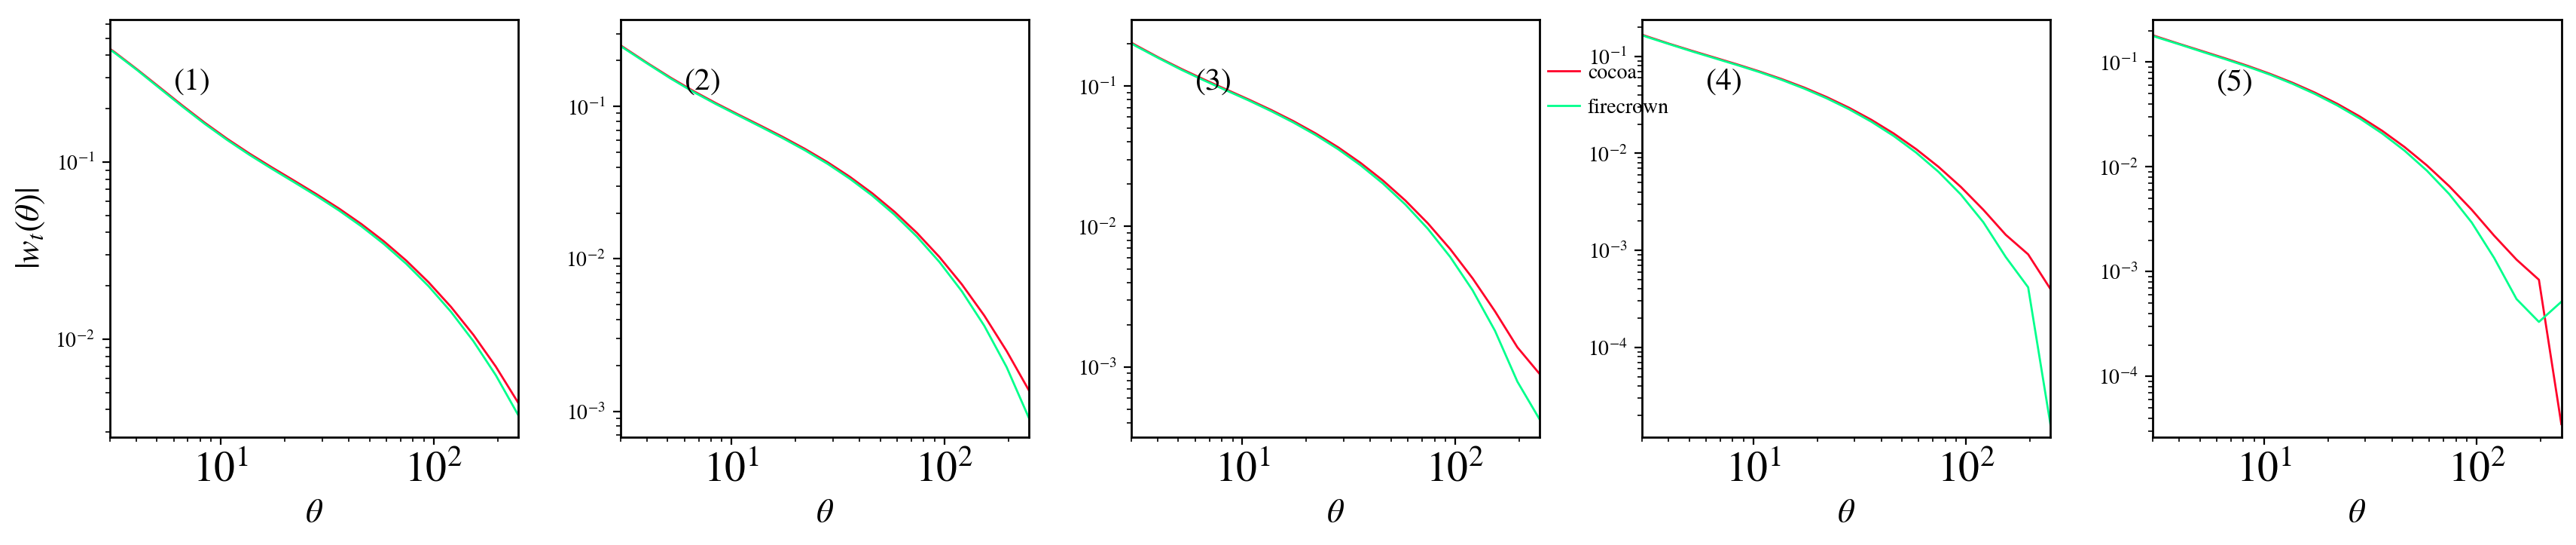

In [31]:
plot_wtheta_tomo([Input_wtheta_cocoa, Input_wtheta_fire], legend=['cocoa', 'firecrown'],figsize = (21, 18./5),)

compare nz

In [32]:
import numpy as np
from astropy.io import fits

In [33]:
nz_src_cocoa = np.loadtxt('./cocoa/Cocoa/projects/des_y3/data/y1_data/des_y1_srcs.nz')
nz_src_fire  = fits.open('./firecrown/examples/des_y1_3x2pt/sacc_data.fits')

In [34]:
for i in range(6,10):
    for j in range(len(nz_src_fire[i].data)):
        z1 = nz_src_fire[i].data[j][0]
        z2 = nz_src_cocoa[j,0]
        if z1 != z2:
            print(f'found difference at src {i-6}, \
                firecrown z is {z1} and cocoa z is {z2}')
            break
    print(f'check done! src {i-6} : z between cocoa and firecrown data are the same')
    for j in range(len(nz_src_fire[i].data)):
        data1 = nz_src_fire[i].data[j][1]
        data2 = nz_src_cocoa[j,i-5]
        if data1 != data2:
            print(f'found difference at src {i-6}, \
                firecrown n(z) is {data1} and cococa n(z) is {data2}')
            break
    print(f'check done! src {i-6} :n(z) between cocoa and firecrown are the same')

check done! src 0 : z between cocoa and firecrown data are the same
check done! src 0 :n(z) between cocoa and firecrown are the same
check done! src 1 : z between cocoa and firecrown data are the same
check done! src 1 :n(z) between cocoa and firecrown are the same
check done! src 2 : z between cocoa and firecrown data are the same
check done! src 2 :n(z) between cocoa and firecrown are the same
check done! src 3 : z between cocoa and firecrown data are the same
check done! src 3 :n(z) between cocoa and firecrown are the same


In [ ]:
cocoa = np.loadtxt('./cocoa/Cocoa/projects/des_y3/chains/des_y1_3x2pt_modelvector')
fire = np.loadtxt('./firecrown/examples/des_y1_3x2pt/output_factory1/data_vector/')